In [ ]:
# Cricket Player Performance Analysis
# Author: Sneha Gandu
# Purpose: Load batting & bowling datasets, perform EDA, and create visuals.

import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# create folders (in case they don't exist)
Path("data").mkdir(exist_ok=True)
Path("images").mkdir(exist_ok=True)

sns.set_theme(style="whitegrid")
print("Setup complete ")

Setup complete 


In [31]:
print(" Current working directory:", os.getcwd())
print("\nTop-level items:")
for item in sorted(os.listdir(".")):
    print(" -", item)

data_path = Path("data")
print("\nFiles inside data/:")
if data_path.exists():
    for f in sorted(data_path.iterdir()):
        print(" -", f.name)
else:
    print(" (no data/ folder yet — upload using the left sidebar)")

# Show only possible dataset files
candidates = [f.name for f in data_path.glob("*") if f.suffix.lower() in [".csv", ".xlsx", ".xls"]]
candidates += [f for f in os.listdir(".") if f.lower().endswith((".csv", ".xlsx", ".xls"))]
candidates = sorted(set(candidates))
print("\nDetected data-related files:")
for c in candidates:
    print(" -", c)

if not candidates:
    print("\n Upload batting and bowling data into data/ (use the left panel ➜ upload icon).")

 Current working directory: /content

Top-level items:
 - .config
 - .ipynb_checkpoints
 - data
 - images
 - sample_data

Files inside data/:
 - batting.csv.xlsx
 - bowling.csv.xlsx

Detected data-related files:
 - batting.csv.xlsx
 - bowling.csv.xlsx


In [39]:
batting_file = "data/batting.csv.xlsx"
bowling_file = "data/bowling.csv.xlsx"

def load_table(path):
    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(f" File not found: {p}")
    if p.suffix.lower() in [".xls", ".xlsx"]:
        df = pd.read_excel(p)
    else:
        df = pd.read_csv(p)
    print(f" Loaded {p.name} — shape: {df.shape}")
    return df

batting = load_table(batting_file)
bowling = load_table(bowling_file)

 Loaded batting.csv.xlsx — shape: (10, 9)
 Loaded bowling.csv.xlsx — shape: (10, 9)


In [33]:
def describe_df(df, name):
    print(f"\n {name} dataset overview:")
    display(df.head())
    print(f"Shape: {df.shape}")
    print("Columns:", list(df.columns))
    display(df.describe(include='all').T)

describe_df(batting, "Batting")
describe_df(bowling, "Bowling")


 Batting dataset overview:


,Player_Id,Player_Name,Team,Match_Date,Runs,Balls,Fours,Sixes,Not_Out
0,1,Virat Kohli,India,2024-11-02,78,65,8,1,0
1,2,Joe Root,England,2024-10-20,34,41,2,0,0
2,3,Steve Smith,Australia,2024-09-30,120,102,12,3,0
3,4,Shubman Gill,India,2024-08-12,45,38,4,1,1
4,5,Rohit Sharma,India,2024-07-08,0,1,0,0,0


Shape: (10, 9)
Columns: ['Player_Id', 'Player_Name', 'Team', 'Match_Date', 'Runs', 'Balls', 'Fours', 'Sixes', 'Not_Out']


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Player_Id,10.0,NaN,NaN,NaN,5.5,1.0,3.25,5.5,7.75,10.0,3.02765
Player_Name,10,10,Virat Kohli,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team,10,5,India,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Match_Date,10,NaN,NaN,NaN,2024-06-29 02:24:00,2024-02-02 00:00:00,2024-04-20 12:00:00,2024-06-26 00:00:00,2024-09-17 18:00:00,2024-11-02 00:00:00,NaN
Runs,10.0,NaN,NaN,NaN,62.3,0.0,36.75,60.0,86.25,120.0,37.762562
Balls,10.0,NaN,NaN,NaN,56.0,1.0,38.75,56.0,73.0,102.0,29.589788
Fours,10.0,NaN,NaN,NaN,6.0,0.0,3.25,5.5,8.75,12.0,3.944053
Sixes,10.0,NaN,NaN,NaN,0.9,0.0,0.0,0.5,1.75,3.0,1.100505
Not_Out,10.0,NaN,NaN,NaN,0.1,0.0,0.0,0.0,0.0,1.0,0.316228



 Bowling dataset overview:


,Player_Id,Player_Name,Team,Match_Date,Overs,Maidens,Runs_Conceded,Wickets,Economy
0,11,Jasprit Bumrah,India,2024-11-02,10,0,42,2,4.20
1,12,Pat Cummins,Australia,2024-10-20,10,1,33,3,3.30
2,13,James Anderson,England,2024-09-30,8,0,46,1,5.75
3,14,Mitchel Starc,Australia,2024-08-12,10,0,51,4,5.10
4,15,Shaheen Afridi,Pakisthan,2024-07-08,9,0,40,2,4.44


Shape: (10, 9)
Columns: ['Player_Id', 'Player_Name', 'Team', 'Match_Date', 'Overs', 'Maidens', 'Runs_Conceded', 'Wickets', 'Economy']


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Player_Id,10.0,NaN,NaN,NaN,15.5,11.0,13.25,15.5,17.75,20.0,3.02765
Player_Name,10,10,Jasprit Bumrah,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team,10,7,India,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Match_Date,10,NaN,NaN,NaN,2024-06-29 02:24:00,2024-02-02 00:00:00,2024-04-20 12:00:00,2024-06-26 00:00:00,2024-09-17 18:00:00,2024-11-02 00:00:00,NaN
Overs,10.0,NaN,NaN,NaN,8.7,4.0,8.0,9.5,10.0,10.0,1.888562
Maidens,10.0,NaN,NaN,NaN,0.1,0.0,0.0,0.0,0.0,1.0,0.316228
Runs_Conceded,10.0,NaN,NaN,NaN,39.3,20.0,33.75,38.5,45.0,60.0,11.421714
Wickets,10.0,NaN,NaN,NaN,2.1,0.0,1.25,2.0,3.0,4.0,1.197219
Economy,10.0,NaN,NaN,NaN,4.629,2.8,3.825,4.47,5.075,7.5,1.336234


In [40]:
# Find columns automatically
def find_col(df, keywords):
    for col in df.columns:
        for key in keywords:
            if key.lower() in col.lower():
                return col
    return None

bat_player = find_col(batting, ["player", "name"])
bat_runs = find_col(batting, ["runs", "totalruns", "score"])
bowl_player = find_col(bowling, ["player", "name"])
bowl_wickets = find_col(bowling, ["wickets", "wkts", "wkt"])

print("Detected columns:")
print(" Batting player →", bat_player)
print(" Batting runs   →", bat_runs)
print(" Bowling player →", bowl_player)
print(" Bowling wickets→", bowl_wickets)

Detected columns:
 Batting player → Player_Id
 Batting runs   → Runs
 Bowling player → Player_Id
 Bowling wickets→ Wickets


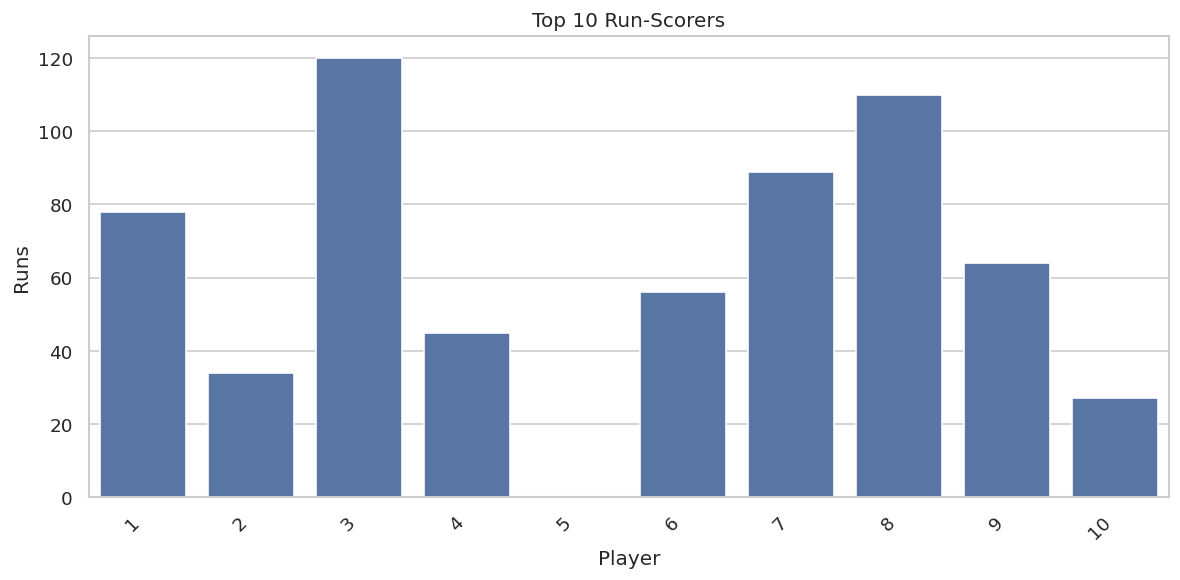

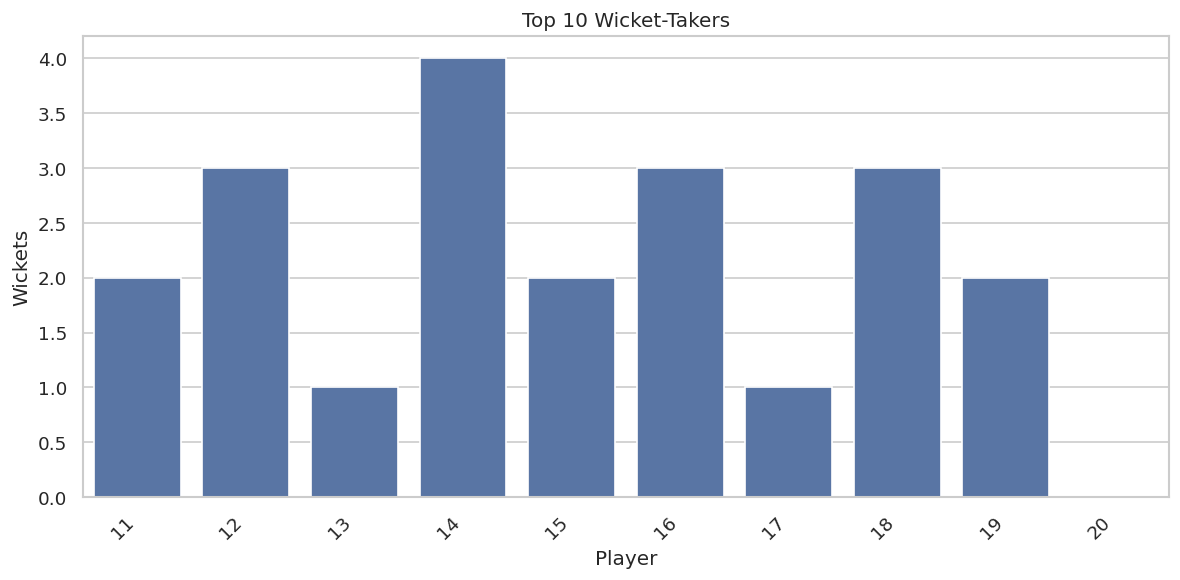

In [35]:
plt.rcParams.update({"figure.dpi": 120})

# Top 10 Run Scorers
if bat_player and bat_runs:
    top_batters = batting.nlargest(10, bat_runs)
    plt.figure(figsize=(10,5))
    sns.barplot(data=top_batters, x=bat_player, y=bat_runs)
    plt.xticks(rotation=45, ha='right')
    plt.title("Top 10 Run-Scorers")
    plt.xlabel("Player"); plt.ylabel("Runs")
    plt.tight_layout()
    plt.savefig("images/top_10_run_scorers.png")
    plt.show()
else:
    print(" Run columns not found.")

# Top 10 Wicket Takers
if bowl_player and bowl_wickets:
    top_bowlers = bowling.nlargest(10, bowl_wickets)
    plt.figure(figsize=(10,5))
    sns.barplot(data=top_bowlers, x=bowl_player, y=bowl_wickets)
    plt.xticks(rotation=45, ha='right')
    plt.title("Top 10 Wicket-Takers")
    plt.xlabel("Player"); plt.ylabel("Wickets")
    plt.tight_layout()
    plt.savefig("images/top_10_wicket_takers.png")
    plt.show()
else:
    print(" Wicket columns not found.")

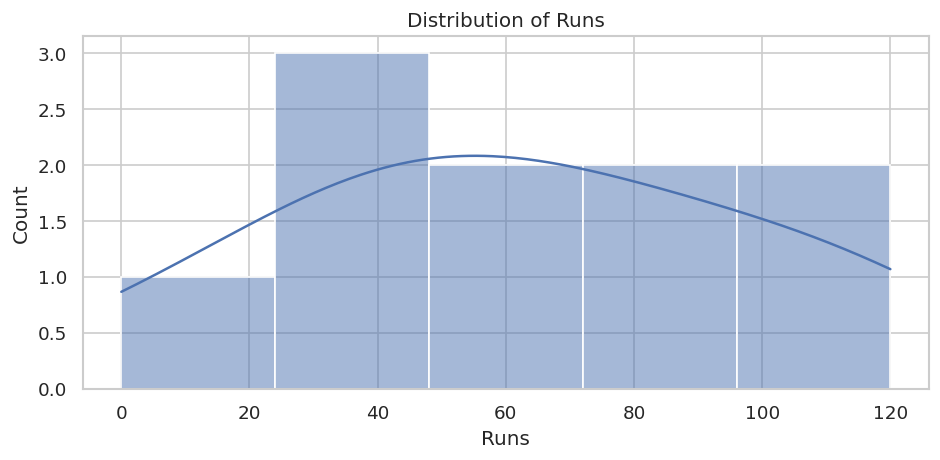

In [36]:
if bat_runs and pd.api.types.is_numeric_dtype(batting[bat_runs]):
    plt.figure(figsize=(8,4))
    sns.histplot(batting[bat_runs].dropna(), kde=True)
    plt.title("Distribution of Runs")
    plt.xlabel("Runs")
    plt.tight_layout()
    plt.savefig("images/runs_distribution.png")
    plt.show()

In [37]:
if bat_player and bowl_player:
    common = sorted(
        set(batting[bat_player].astype(str)) &
        set(bowling[bowl_player].astype(str))
    )
    print(f"Players appearing in both batting & bowling datasets (sample): {common[:10]}")
else:
    print("Skipping overlap check — player columns not found.")

Players appearing in both batting & bowling datasets (sample): []


In [38]:
summary = pd.DataFrame({
    "Dataset": ["Batting", "Bowling"],
    "Rows": [len(batting), len(bowling)],
    "Columns": [len(batting.columns), len(bowling.columns)]
})
summary.to_csv("images/dataset_summary.csv", index=False)
print(" Saved summary CSV and plots inside /images")
!ls -la images

 Saved summary CSV and plots inside /images
total 96
drwxr-xr-x 2 root root  4096 Oct 24 05:43 .
drwxr-xr-x 1 root root  4096 Oct 24 05:25 ..
-rw-r--r-- 1 root root    47 Oct 24 05:49 dataset_summary.csv
-rw-r--r-- 1 root root 29154 Oct 24 05:49 runs_distribution.png
-rw-r--r-- 1 root root 22854 Oct 24 05:48 top_10_run_scorers.png
-rw-r--r-- 1 root root 26208 Oct 24 05:48 top_10_wicket_takers.png
